# Data Analytics Coursework
**Oliwier Kulczycki**

# Setup

In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import arff

In [21]:
path_full = "credits-clean.csv"
df = pd.read_csv(path_full)

bar_width = 0.25

Show the original dataframe for reference.

In [22]:
df

,Case_no,checking_status,credit_history,purpose,credit_amount,saving_status,personal_status,age,job,class
0,1,<0,critical/other existing credit,radio/tv,1169,no known savings,male single,67,skilled,good
1,2,0<=X<200,existing paid,radio/tv,5951,<100,female div/dep/mar,22,skilled,bad
2,3,no checking,critical/other existing credit,education,2096,<100,male single,49,unskilled resident,good
3,4,<0,existing paid,furniture/equipment,7882,<100,male single,45,skilled,good
4,5,<0,delayed previously,new car,4870,<100,male single,53,skilled,bad
...,...,...,...,...,...,...,...,...,...,...
995,996,no checking,existing paid,furniture/equipment,1736,<100,female div/dep/mar,31,unskilled resident,good
996,997,<0,existing paid,used car,3857,<100,male div/sep,40,high qualif/self emp/mgmt,good
997,998,no checking,existing paid,radio/tv,804,<100,male single,38,skilled,good
998,999,<0,existing paid,radio/tv,1845,<100,male single,23,skilled,bad


***

# Dataset Versions
*(Nominal and Numeric Conversions)*

## Converting to numeric
For this task, I decided to use a method which 'enumrates' through every unique value within each column and assigns it an integer.

In [23]:
# Have to create a copy of the dataframe using df.copy(),
# otherwise the variable df_numeric would just end up pointing to df, instead of being separate.
# This messed me up for a while as the rest of the program wouldn't work.
df_numeric = df.copy()

In [24]:
# Go through each column.
for col in df_numeric.columns:
    # Avoid the already numeric fields.
    if col == 'Case_no' or col == 'credit_amount' or col == 'age':
        continue
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

# Show the work done.
df_numeric

,Case_no,checking_status,credit_history,purpose,credit_amount,saving_status,personal_status,age,job,class
0,1,1,1,6,1169,4,3,67,1,1
1,2,0,3,6,5951,2,0,22,1,0
2,3,3,1,2,2096,2,3,49,3,1
3,4,1,3,3,7882,2,3,45,1,1
4,5,1,2,4,4870,2,3,53,1,0
...,...,...,...,...,...,...,...,...,...,...
995,996,3,3,3,1736,2,0,31,3,1
996,997,1,3,9,3857,2,1,40,0,1
997,998,3,3,6,804,2,3,38,1,1
998,999,1,3,6,1845,2,3,23,1,0


In [25]:
for col in df_numeric.columns:
    if col == 'Case_no' or col == 'credit_amount' or col == 'age':
        continue
    categories = df[col].astype('category').cat.categories
    codes = list(range(len(categories)))
    mapping = dict(zip(codes, categories))
    print(f"{col} mapping:", mapping)

checking_status mapping: {0: '0<=X<200', 1: '<0', 2: '>=200', 3: 'no checking'}
credit_history mapping: {0: 'all paid', 1: 'critical/other existing credit', 2: 'delayed previously', 3: 'existing paid', 4: 'no credits/all paid'}
purpose mapping: {0: 'business', 1: 'domestic appliance', 2: 'education', 3: 'furniture/equipment', 4: 'new car', 5: 'other', 6: 'radio/tv', 7: 'repairs', 8: 'retraining', 9: 'used car'}
saving_status mapping: {0: '100<=X<500', 1: '500<=X<1000', 2: '<100', 3: '>=1000', 4: 'no known savings'}
personal_status mapping: {0: 'female div/dep/mar', 1: 'male div/sep', 2: 'male mar/wid', 3: 'male single'}
job mapping: {0: 'high qualif/self emp/mgmt', 1: 'skilled', 2: 'unemp/unskilled non res', 3: 'unskilled resident'}
class mapping: {0: 'bad', 1: 'good'}


Creates the numeric version of the .csv file.

In [26]:
# Have to include 'index=False'.
pd.DataFrame.to_csv(df_numeric, "credits-clean-numeric(indexed).csv", index=True) # bad
pd.DataFrame.to_csv(df_numeric, "credits-clean-numeric.csv", index=False)

## Converting to nominal
Grouping numeric values into a text representation.

In [27]:
df_nominal = df.copy()

Casting the Case_no to string. There is no good string representation of these as these are indexes.

In [28]:
# Show type of attribute before any changes are made.
print("Type pre:", df_nominal['Case_no'].dtype)

# Casting the type to string.
df_nominal['Case_no'] = df['Case_no'].astype(str)

# Display and prove change of type.
print("Type post:", df_nominal['Case_no'].dtype)
# Output should come out as simply 'object'

Type pre: int64
Type post: object


Deciding the ranges for each label.

In [29]:
# Bins for the 'age' attribute.
bins_age = [0, 18, 30, 60, 80]
labels_age = ["child", "young-adult", "adult", "elderly"]

# Bins for the 'credit_amount' attribute.
bins_credit_amount = [0, 500, 1000, 2000, 5000, 10000, 100000]
labels_credit_amount = ["very-low", "low", "moderate", "high", "really-high", "exceptional"]

Applying the value bins.

In [30]:
# Use the pd.cut() as per the documentation.
# This is a tool already made for binning and classification.
df_nominal['age'] = pd.cut(df_nominal['age'], bins=bins_age, labels=labels_age)
df_nominal['credit_amount'] = pd.cut(df_nominal['credit_amount'], bins=bins_credit_amount, labels=labels_credit_amount)

# Show work done.
print(df_nominal['credit_amount'].value_counts())
print(df_nominal['age'].value_counts())

credit_amount
high           377
moderate       312
really-high    147
low             97
exceptional     47
very-low        20
Name: count, dtype: int64
age
adult          544
young-adult    411
elderly         45
child            0
Name: count, dtype: int64


Save the file

In [31]:
pd.DataFrame.to_csv(df_nominal, "credits-clean-nominal.csv", index=False)

***

# Data visualisation
Using pyplot.

## Distribution of Credit Class by Personal Status
- Count the occurrences of 'good' and 'bad' for each unique entry in the 'personal_status' field.
- Group them together for easy displaying.
- Plot as a double bar chart.

### Counts
Using the .value_counts() we can calculate the occurrences of each credit class for each unique personal status.

In [32]:
# Do counts for each 'personal_status' value where 'class' attribute is 'good'.
counts_good_personal_status = df[df['class'] == 'good']['personal_status'].value_counts()

# Do the same as above except only for when the 'class' attribute is 'bad'.
counts_bad_personal_status = df[df['class'] == 'bad']['personal_status'].value_counts()

### Data Preperation
Plotting is done using a double-bar chart. This way we can more easily and effectively display what is most important. This also acts like a point of comparison between the two credit classes.
A width parameter is necessary to avoid bars overlapping with each other on the same x-values.

#### Decoration
First the actual figure is created along with an axes. Some decoration is created; title, and labels.

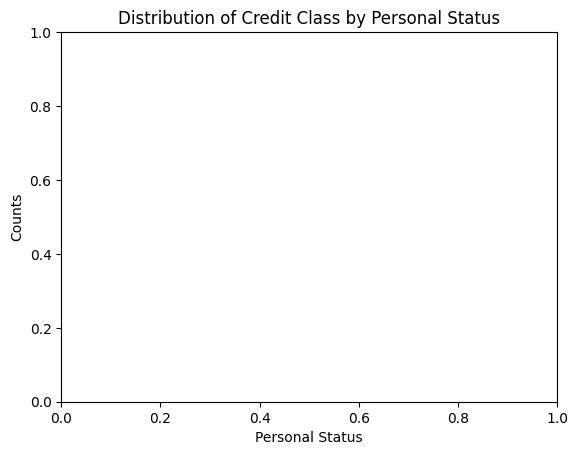

In [33]:
# Create a figure and axes object for the creation of the graph.
fig_personal_status, g1 = plt.subplots()

# Minor details and decorations for easier viewing and labels.
g1.set_title("Distribution of Credit Class by Personal Status")
g1.set_xlabel("Personal Status")
g1.set_ylabel("Counts");

# I can't get it to not show the empty graph
    # (at least on PyCharm)

#### X-Axis Labels
The X-axis labels have to be evenly arranged, for this the .set_xticks() function is used to tell pyplot where to set the x-axis labels.
The .unique() pandas function is used to get all the unique saving_status entries. These are then used as x-axis labels from where the bar charts will have their roots.

In [34]:
# Calculate the positions of each bar origin.
# This will save the positions which can then be used to calculate the offset for the two bars.
statuses = df['personal_status'].unique()
x = np.arange(len(statuses))
g1.set_xticks(x)
g1.set_xticklabels(statuses)

[Text(0, 0, 'male single'),
 Text(1, 0, 'female div/dep/mar'),
 Text(2, 0, 'male div/sep'),
 Text(3, 0, 'male mar/wid')]

### Plotting

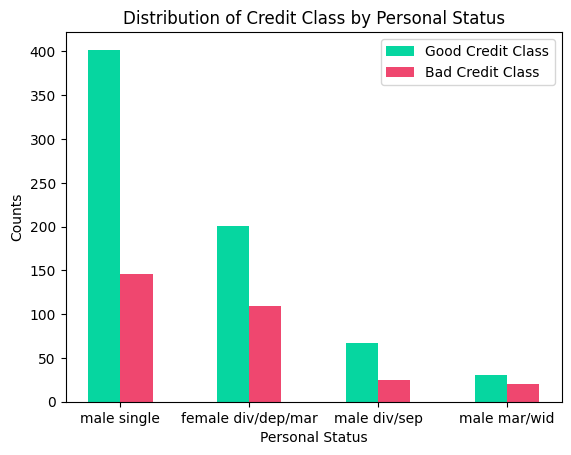

In [35]:
# Plotting the finished data using the .bar() function to create bar graphs.
g1.bar(x - bar_width/2, counts_good_personal_status, bar_width, label='Good Credit Class', color='#06d6a0')

# By plotting it twice and offsetting them from the original positions decided by 'x' variable,
# it's possible to display both right next to each other.
g1.bar(x + bar_width/2, counts_bad_personal_status, bar_width, label='Bad Credit Class', color='#ef476f')
g1.legend()

# Display final figure (graph).
fig_personal_status

## Distribution of Credit Class by Saving Status
- Count the occurrences of 'good' and 'bad' for each unique entry in the 'saving_status' field.
- Group them together for easy displaying.
- Plot as a double bar chart.
- *(this is the same as the task above just with a different field)*.

### Counting
Counting is done the same way as the chart above.

In [36]:
# Counting (same as before)
counts_good_saving_status = df[df['class'] == 'good']['saving_status'].value_counts()
counts_bad_saving_status = df[df['class'] == 'bad']['saving_status'].value_counts()

### Data Preperation

#### Decoration
First the actual figure is created along with an axes. Some decoration is created; title, and labels.

Text(0, 0.5, 'Counts')

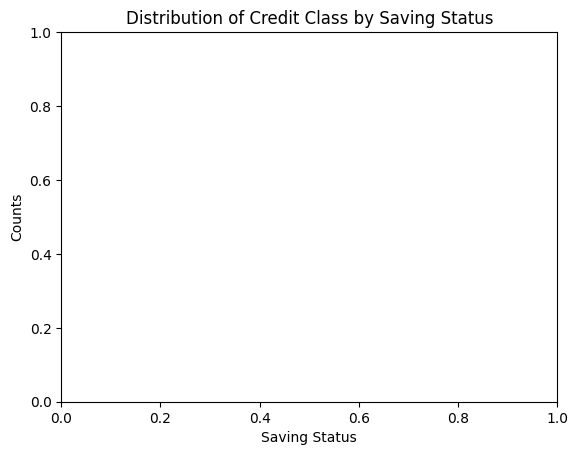

In [37]:
# Create NEW figure and axes objects (same as before)
fig_saving_status, g2 = plt.subplots()
g2.set_title("Distribution of Credit Class by Saving Status")
g2.set_xlabel("Saving Status")
g2.set_ylabel("Counts")

#### X-Axis Labels
The X-axis labels have to be evenly arranged, for this the .set_xticks() function is used to tell pyplot where to set the x-axis labels.
The .unique() pandas function is used to get all the unique saving_status entries. These are then used as x-axis labels from where the bar charts will have their roots.

In [38]:
statuses = df['saving_status'].unique()
x = np.arange(len(statuses))
g2.set_xticks(x)
g2.set_xticklabels(statuses)

[Text(0, 0, 'no known savings'),
 Text(1, 0, '<100'),
 Text(2, 0, '500<=X<1000'),
 Text(3, 0, '>=1000'),
 Text(4, 0, '100<=X<500')]

### Plotting

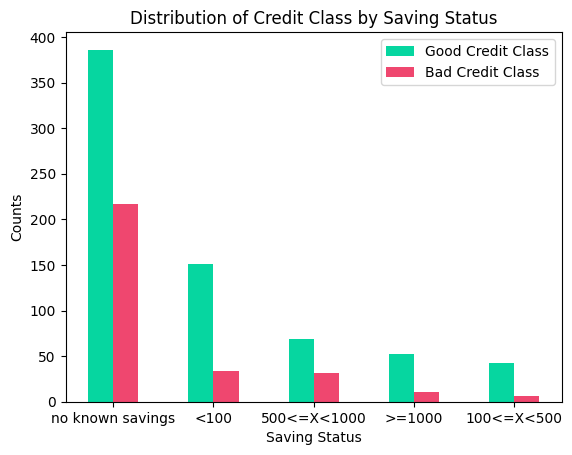

In [39]:
# Plotting here.
g2.bar(x - bar_width/2, counts_good_saving_status, bar_width, label='Good Credit Class', color='#06d6a0')
g2.bar(x + bar_width/2, counts_bad_saving_status, bar_width, label='Bad Credit Class', color='#ef476f')
g2.legend()

fig_saving_status